In [127]:
# import dependencies

import pandas as pd
import os

In [128]:
# import DataFrame of crime types

crime_type_file = os.path.join('..', 'Data', 'Offense_Category_Type_2020.csv')
crime_type_df = pd.read_csv(crime_type_file)
crime_type_df.head()

,Offense_Category,Offense_Type
0,Assault,Person
1,Homicide,Person
2,Human Trafficking,Person
3,Kidnapping_Abduction,Person
4,Sex,Person


In [129]:
# import DataFrame of crime stats

crime_file = os.path.join('..', 'Data', 'Crime_Offense_Category_by_State_2020.csv')
crime_df = pd.read_csv(crime_file)

# add a column of 'Offense_Type'

for i in range(len(crime_df)):
    for j in range(len(crime_type_df)):
        if crime_df.loc[i, 'Offense_Category'] == crime_type_df.loc[j, 'Offense_Category']:
            crime_df.loc[i, 'Offense_Type'] = crime_type_df.loc[j, 'Offense_Type']

crime_df.head()

,State,Offense_Category,Volume,Offense_Type
0,Alabama,Assault,4214,Person
1,Alabama,Homicide,24,Person
2,Alabama,Human Trafficking,0,Person
3,Alabama,Kidnapping_Abduction,52,Person
4,Alabama,Sex,94,Person


In [130]:
crime_df.isna().sum()

State               0
Offense_Category    0
Volume              0
Offense_Type        0
dtype: int64

In [131]:
# group  DataFrame by 'Offense_Type' and 'State'

crime_grouped_df = crime_df.groupby(['State', 'Offense_Type']).sum()
crime_grouped_df.head()

Volume
State   Offense_Type        
Alabama Person          4384
        Property        7981
        Society         3235
Arizona Person         18440
        Property       47284

In [132]:
# group DataFrame by 'State'
crime_state_df = crime_df.groupby(['State']).sum()
crime_state_df.head()

,Volume
State,
Alabama,15600
Arizona,83963
Arkansas,235122
Colorado,353126
Connecticut,116810


In [133]:
# import DataFrame of law enforcement

law_enforcement_file = os.path.join('..', 'Data', 'Law_Enforcement_Employees_State_2020.csv')
law_enforcement_df = pd.read_csv(law_enforcement_file)
law_enforcement_df.head()

,State,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop
0,Alabama,17985,11203,1014,2003,3765,387,4851203
1,Alaska,2002,1170,120,265,447,37,730400
2,Arizona,22526,11308,1450,4485,5283,110,7359580
3,Arkansas,10442,6087,724,1375,2256,288,3011972
4,California,120756,68774,10862,15350,25770,460,33781093


In [134]:
# add a new column for the ratio of law enforcement to population

law_enforcement_df['law_to_pop_ratio'] = law_enforcement_df['Total_law_ employees'] / law_enforcement_df['Est_pop']
law_enforcement_df.head()

,State,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop,law_to_pop_ratio
0,Alabama,17985,11203,1014,2003,3765,387,4851203,0.003707
1,Alaska,2002,1170,120,265,447,37,730400,0.002741
2,Arizona,22526,11308,1450,4485,5283,110,7359580,0.003061
3,Arkansas,10442,6087,724,1375,2256,288,3011972,0.003467
4,California,120756,68774,10862,15350,25770,460,33781093,0.003575


In [135]:
# merge with the crime table 

df = crime_state_df.merge(law_enforcement_df, how='inner', left_on='State', right_on='State')#[['State', 'Volume', 'law_to_pop_ratio']]
df['crime_to_pop_ratio'] = df['Volume'] / df['Est_pop']
df.head()

,State,Volume,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop,law_to_pop_ratio,crime_to_pop_ratio
0,Alabama,15600,17985,11203,1014,2003,3765,387,4851203,0.003707,0.003216
1,Arizona,83963,22526,11308,1450,4485,5283,110,7359580,0.003061,0.011409
2,Arkansas,235122,10442,6087,724,1375,2256,288,3011972,0.003467,0.078062
3,Colorado,353126,18853,10801,1885,2260,3907,237,5753378,0.003277,0.061377
4,Connecticut,116810,9163,6814,892,595,862,107,3557006,0.002576,0.032839


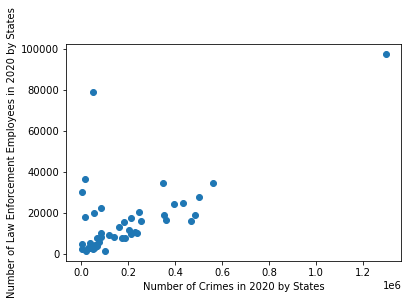

In [136]:
# visualize the data

import matplotlib.pyplot as plt
plt.scatter(df['Volume'],
            df['Total_law_ employees'])
# plt.title()
plt.xlabel("Number of Crimes in 2020 by States")
plt.ylabel("Number of Law Enforcement Employees in 2020 by States")

plt.show()

## Higher number of crimes leads to more law enforcement employees. A linear correlation can be observed.

In [137]:
# import linregress
from scipy.stats import linregress

In [138]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\nr value = " + str(round(r_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

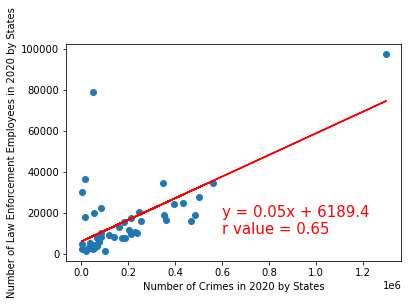

In [139]:
x_values = df['Volume']
y_values = df['Total_law_ employees']

plot_linear_regression(x_values, 
                       y_values, 
                       '', 
                       "Number of Crimes in 2020 by States", 
                       "Number of Law Enforcement Employees in 2020 by States", 
                       (600000, 10000))

## The r value of the linear regression is 0.65. It explains the majority of the correlation. Other factors may play part as well, such as economic level, population density, etc.

In [140]:
# import DataFrame of GDP per state

gdp_file = os.path.join('..', 'Data', 'GDP_by_State_2020.csv')
gdp_df = pd.read_csv(gdp_file)

gdp_df.head()

,State,Q1,Q2,Q3,Q4,2020_Sum
0,Alabama,"233,525","211,064","230,034","232,964","907,587"
1,Alaska,"53,066","45,332","49,716","51,166","199,280"
2,Arizona,"383,723","348,826","378,536","383,791","1,494,876"
3,Arkansas,"134,411","121,146","132,589","134,857","523,003"
4,California,"3,098,986","2,812,495","3,046,249","3,071,021","12,028,751"


In [141]:
gdp_df['2020_Sum'] = gdp_df['2020_Sum'].map(lambda x: float(''.join(x.split(',')))).astype(int)
gdp_df.dtypes

State       object
Q1          object
Q2          object
Q3          object
Q4          object
2020_Sum     int32
dtype: object

In [142]:
# merge with the df table 

df2 = df.merge(gdp_df, how='inner', left_on='State', right_on='State')#[['State', 'Volume', 'law_to_pop_ratio']]
df2['gdp_to_pop_ratio'] = df2['2020_Sum'] / df2['Est_pop']
columns_to_keep = ['State', 'Volume', 'Est_pop', '2020_Sum']
df2 = df2[columns_to_keep]
df2.head()

,State,Volume,Est_pop,2020_Sum
0,Alabama,15600,4851203,907587
1,Arizona,83963,7359580,1494876
2,Arkansas,235122,3011972,523003
3,Colorado,353126,5753378,1530338
4,Connecticut,116810,3557006,1105691


## Machine Learning model

In [143]:
df2.dtypes

State       object
Volume       int64
Est_pop      int64
2020_Sum     int32
dtype: object

In [144]:
df3 = df2.drop(['State'], axis=1)
df3.head()

,Volume,Est_pop,2020_Sum
0,15600,4851203,907587
1,83963,7359580,1494876
2,235122,3011972,523003
3,353126,5753378,1530338
4,116810,3557006,1105691


In [145]:
# import dependencies
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

In [146]:
# Elbow Curve

inertia = []
k = list(range(1, 11))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df3)
    inertia.append(km.inertia_)

C:\Users\alexi\.conda\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [147]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

### The Elbow Curve indicates 5 clusters.

In [148]:
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [150]:
five_clusters = get_clusters(5, df3)
five_clusters.head()

,Volume,Est_pop,2020_Sum,class
0,15600,4851203,907587,0
1,83963,7359580,1494876,2
2,235122,3011972,523003,3
3,353126,5753378,1530338,0
4,116810,3557006,1105691,0


In [152]:
# Plotting the clusters with three features
fig = px.scatter_3d(five_clusters, 
                    x="2020_Sum", 
                    y="Est_pop", 
                    z="Volume", 
                    color="class", 
                    symbol="class", 
#                     size="crime_to_pop_ratio",
                    width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

## inter-correlations

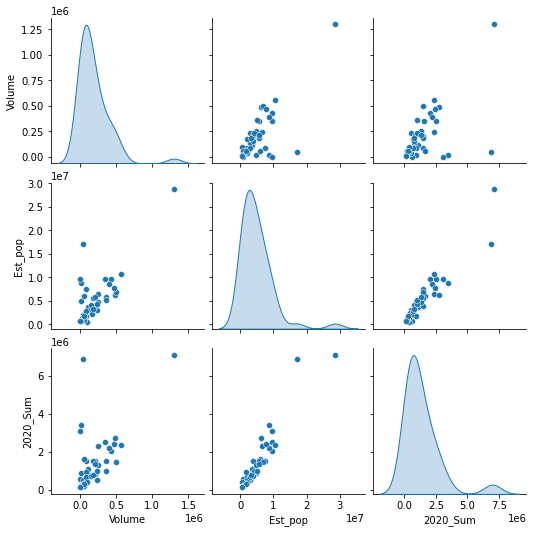

In [153]:
import seaborn as sns

sns.pairplot(four_clusters[['Volume', 'Est_pop', '2020_Sum']], diag_kind='kde')

In [155]:
y = df3['Volume']
X = df3.drop(['Volume'], axis=1)

In [156]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [157]:
import numpy as np
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

print(normalizer.mean.numpy())

[[4548925.5 1235690.2]]


In [158]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[763847 219417]]

Normalized: [[-0.72 -0.65]]


## Build a neural network model

In [159]:
import sklearn as skl
import tensorflow as tf

In [161]:
y = df3['Volume']
X = df3.drop(['Volume'], axis=1)

In [162]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [163]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [164]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))
# nn_model.add(tf.keras.layers.Dense(units=2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 18        
                                                                 
 dense_16 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [165]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mean_absolute_error", 
                 optimizer=tf.optimizers.Adam(learning_rate=0.1), 
#                  metrics=["MeanSquaredError"]
                )

In [166]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
2/2 [==============================] - 0s 2ms/step - loss: 198347.8125
Epoch 2/5000
2/2 [==============================] - 0s 2ms/step - loss: 198347.0312
Epoch 3/5000
2/2 [==============================] - 0s 1ms/step - loss: 198346.3125
Epoch 4/5000
2/2 [==============================] - 0s 3ms/step - loss: 198345.5156
Epoch 5/5000
2/2 [==============================] - 0s 2ms/step - loss: 198344.4688
Epoch 6/5000
2/2 [==============================] - 0s 2ms/step - loss: 198343.2656
Epoch 7/5000
2/2 [==============================] - 0s 999us/step - loss: 198341.7812
Epoch 8/5000
2/2 [==============================] - 0s 2ms/step - loss: 198340.0938
Epoch 9/5000
2/2 [==============================] - 0s 3ms/step - loss: 198338.0781
Epoch 10/5000
2/2 [==============================] - 0s 2ms/step - loss: 198335.7344
Epoch 11/5000
2/2 [==============================] - 0s 2ms/step - loss: 198333.0781
Epoch 12/5000
2/2 [==============================] - 0s 2ms/step - loss:

2/2 [==============================] - 0s 2ms/step - loss: 194371.3438
Epoch 98/5000
2/2 [==============================] - 0s 2ms/step - loss: 194288.0469
Epoch 99/5000
2/2 [==============================] - 0s 2ms/step - loss: 194203.2344
Epoch 100/5000
2/2 [==============================] - 0s 2ms/step - loss: 194117.4062
Epoch 101/5000
2/2 [==============================] - 0s 1ms/step - loss: 194030.6875
Epoch 102/5000
2/2 [==============================] - 0s 1ms/step - loss: 193946.1250
Epoch 103/5000
2/2 [==============================] - 0s 2ms/step - loss: 193860.0938
Epoch 104/5000
2/2 [==============================] - 0s 1ms/step - loss: 193778.2188
Epoch 105/5000
2/2 [==============================] - 0s 1ms/step - loss: 193696.0312
Epoch 106/5000
2/2 [==============================] - 0s 2ms/step - loss: 193618.5312
Epoch 107/5000
2/2 [==============================] - 0s 2ms/step - loss: 193537.5781
Epoch 108/5000
2/2 [==============================] - 0s 2ms/step - los

2/2 [==============================] - 0s 2ms/step - loss: 182560.4688
Epoch 192/5000
2/2 [==============================] - 0s 1000us/step - loss: 182397.2344
Epoch 193/5000
2/2 [==============================] - 0s 1ms/step - loss: 182224.0000
Epoch 194/5000
2/2 [==============================] - 0s 304us/step - loss: 182052.2031
Epoch 195/5000
2/2 [==============================] - 0s 1000us/step - loss: 181881.9844
Epoch 196/5000
2/2 [==============================] - 0s 2ms/step - loss: 181710.4062
Epoch 197/5000
2/2 [==============================] - 0s 999us/step - loss: 181540.0781
Epoch 198/5000
2/2 [==============================] - 0s 2ms/step - loss: 181374.1250
Epoch 199/5000
2/2 [==============================] - 0s 2ms/step - loss: 181202.5781
Epoch 200/5000
2/2 [==============================] - 0s 2ms/step - loss: 181039.5625
Epoch 201/5000
2/2 [==============================] - 0s 2ms/step - loss: 180874.5625
Epoch 202/5000
2/2 [==============================] - 0s 10

2/2 [==============================] - 0s 999us/step - loss: 168623.2500
Epoch 286/5000
2/2 [==============================] - 0s 2ms/step - loss: 168488.7656
Epoch 287/5000
2/2 [==============================] - 0s 2ms/step - loss: 168350.7500
Epoch 288/5000
2/2 [==============================] - 0s 2ms/step - loss: 168220.7500
Epoch 289/5000
2/2 [==============================] - 0s 1ms/step - loss: 168070.5781
Epoch 290/5000
2/2 [==============================] - 0s 2ms/step - loss: 167927.0625
Epoch 291/5000
2/2 [==============================] - 0s 2ms/step - loss: 167770.5938
Epoch 292/5000
2/2 [==============================] - 0s 1ms/step - loss: 167610.8906
Epoch 293/5000
2/2 [==============================] - 0s 2ms/step - loss: 167455.8750
Epoch 294/5000
2/2 [==============================] - 0s 2ms/step - loss: 167297.9844
Epoch 295/5000
2/2 [==============================] - 0s 2ms/step - loss: 167147.1719
Epoch 296/5000
2/2 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 2ms/step - loss: 155645.8906
Epoch 380/5000
2/2 [==============================] - 0s 1000us/step - loss: 155571.4375
Epoch 381/5000
2/2 [==============================] - 0s 1000us/step - loss: 155488.0938
Epoch 382/5000
2/2 [==============================] - 0s 2ms/step - loss: 155405.9219
Epoch 383/5000
2/2 [==============================] - 0s 2ms/step - loss: 155325.0781
Epoch 384/5000
2/2 [==============================] - 0s 1ms/step - loss: 155240.1406
Epoch 385/5000
2/2 [==============================] - 0s 1ms/step - loss: 155165.9844
Epoch 386/5000
2/2 [==============================] - 0s 2ms/step - loss: 155076.0938
Epoch 387/5000
2/2 [==============================] - 0s 998us/step - loss: 154997.3906
Epoch 388/5000
2/2 [==============================] - 0s 1ms/step - loss: 154928.3438
Epoch 389/5000
2/2 [==============================] - 0s 1000us/step - loss: 154853.6562
Epoch 390/5000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 1ms/step - loss: 148625.0625
Epoch 474/5000
2/2 [==============================] - 0s 2ms/step - loss: 148564.5156
Epoch 475/5000
2/2 [==============================] - 0s 2ms/step - loss: 148500.4219
Epoch 476/5000
2/2 [==============================] - 0s 951us/step - loss: 148437.7500
Epoch 477/5000
2/2 [==============================] - 0s 2ms/step - loss: 148381.2969
Epoch 478/5000
2/2 [==============================] - 0s 999us/step - loss: 148324.1562
Epoch 479/5000
2/2 [==============================] - 0s 2ms/step - loss: 148266.9062
Epoch 480/5000
2/2 [==============================] - 0s 928us/step - loss: 148202.2812
Epoch 481/5000
2/2 [==============================] - 0s 2ms/step - loss: 148138.8594
Epoch 482/5000
2/2 [==============================] - 0s 1000us/step - loss: 148073.7969
Epoch 483/5000
2/2 [==============================] - 0s 2ms/step - loss: 148007.2031
Epoch 484/5000
2/2 [==============================] - 0s 916

2/2 [==============================] - 0s 2ms/step - loss: 142141.7500
Epoch 568/5000
2/2 [==============================] - 0s 2ms/step - loss: 142077.5781
Epoch 569/5000
2/2 [==============================] - 0s 2ms/step - loss: 142012.3750
Epoch 570/5000
2/2 [==============================] - 0s 1ms/step - loss: 141949.7031
Epoch 571/5000
2/2 [==============================] - 0s 2ms/step - loss: 141878.9062
Epoch 572/5000
2/2 [==============================] - 0s 1ms/step - loss: 141808.8750
Epoch 573/5000
2/2 [==============================] - 0s 910us/step - loss: 141740.4375
Epoch 574/5000
2/2 [==============================] - 0s 2ms/step - loss: 141666.9062
Epoch 575/5000
2/2 [==============================] - 0s 1000us/step - loss: 141604.7188
Epoch 576/5000
2/2 [==============================] - 0s 1ms/step - loss: 141533.1719
Epoch 577/5000
2/2 [==============================] - 0s 2ms/step - loss: 141466.7344
Epoch 578/5000
2/2 [==============================] - 0s 1ms/ste

2/2 [==============================] - 0s 2ms/step - loss: 133533.0156
Epoch 662/5000
2/2 [==============================] - 0s 2ms/step - loss: 133457.1094
Epoch 663/5000
2/2 [==============================] - 0s 2ms/step - loss: 133374.7656
Epoch 664/5000
2/2 [==============================] - 0s 2ms/step - loss: 133297.2031
Epoch 665/5000
2/2 [==============================] - 0s 2ms/step - loss: 133222.8281
Epoch 666/5000
2/2 [==============================] - 0s 2ms/step - loss: 133137.2031
Epoch 667/5000
2/2 [==============================] - 0s 2ms/step - loss: 133041.7500
Epoch 668/5000
2/2 [==============================] - 0s 2ms/step - loss: 132960.8281
Epoch 669/5000
2/2 [==============================] - 0s 1ms/step - loss: 132855.1562
Epoch 670/5000
2/2 [==============================] - 0s 1ms/step - loss: 132740.9219
Epoch 671/5000
2/2 [==============================] - 0s 1000us/step - loss: 132639.0312
Epoch 672/5000
2/2 [==============================] - 0s 1ms/step 

Epoch 756/5000
2/2 [==============================] - 0s 2ms/step - loss: 125604.1016
Epoch 757/5000
2/2 [==============================] - 0s 1ms/step - loss: 125496.7109
Epoch 758/5000
2/2 [==============================] - 0s 1ms/step - loss: 125410.1875
Epoch 759/5000
2/2 [==============================] - 0s 1ms/step - loss: 125310.4141
Epoch 760/5000
2/2 [==============================] - 0s 2ms/step - loss: 125244.2578
Epoch 761/5000
2/2 [==============================] - 0s 2ms/step - loss: 125183.1719
Epoch 762/5000
2/2 [==============================] - 0s 1ms/step - loss: 125111.6875
Epoch 763/5000
2/2 [==============================] - 0s 1ms/step - loss: 125025.4688
Epoch 764/5000
2/2 [==============================] - 0s 997us/step - loss: 124921.6719
Epoch 765/5000
2/2 [==============================] - 0s 2ms/step - loss: 124810.8984
Epoch 766/5000
2/2 [==============================] - 0s 1ms/step - loss: 124667.5859
Epoch 767/5000
2/2 [==============================] 

2/2 [==============================] - 0s 1000us/step - loss: 115317.5156
Epoch 851/5000
2/2 [==============================] - 0s 2ms/step - loss: 115212.5156
Epoch 852/5000
2/2 [==============================] - 0s 994us/step - loss: 115110.2109
Epoch 853/5000
2/2 [==============================] - 0s 2ms/step - loss: 115008.6250
Epoch 854/5000
2/2 [==============================] - 0s 1000us/step - loss: 114909.2109
Epoch 855/5000
2/2 [==============================] - 0s 999us/step - loss: 114818.4141
Epoch 856/5000
2/2 [==============================] - 0s 2ms/step - loss: 114728.5312
Epoch 857/5000
2/2 [==============================] - 0s 1ms/step - loss: 114636.2656
Epoch 858/5000
2/2 [==============================] - 0s 1ms/step - loss: 114558.4062
Epoch 859/5000
2/2 [==============================] - 0s 1ms/step - loss: 114479.5156
Epoch 860/5000
2/2 [==============================] - 0s 1ms/step - loss: 114404.9766
Epoch 861/5000
2/2 [==============================] - 0s 2m

2/2 [==============================] - 0s 1ms/step - loss: 105533.2266
Epoch 945/5000
2/2 [==============================] - 0s 1ms/step - loss: 105461.6406
Epoch 946/5000
2/2 [==============================] - 0s 2ms/step - loss: 105368.6484
Epoch 947/5000
2/2 [==============================] - 0s 2ms/step - loss: 105292.8594
Epoch 948/5000
2/2 [==============================] - 0s 999us/step - loss: 105240.2031
Epoch 949/5000
2/2 [==============================] - 0s 988us/step - loss: 105167.9219
Epoch 950/5000
2/2 [==============================] - 0s 1ms/step - loss: 105125.3594
Epoch 951/5000
2/2 [==============================] - 0s 1ms/step - loss: 105087.7891
Epoch 952/5000
2/2 [==============================] - 0s 1000us/step - loss: 105050.6328
Epoch 953/5000
2/2 [==============================] - 0s 2ms/step - loss: 105018.0547
Epoch 954/5000
2/2 [==============================] - 0s 1ms/step - loss: 104974.5625
Epoch 955/5000
2/2 [==============================] - 0s 1ms/s

2/2 [==============================] - 0s 997us/step - loss: 99146.6016
Epoch 1039/5000
2/2 [==============================] - 0s 989us/step - loss: 99084.6016
Epoch 1040/5000
2/2 [==============================] - 0s 1ms/step - loss: 99012.5391
Epoch 1041/5000
2/2 [==============================] - 0s 1ms/step - loss: 98941.6953
Epoch 1042/5000
2/2 [==============================] - 0s 983us/step - loss: 98879.0000
Epoch 1043/5000
2/2 [==============================] - 0s 1000us/step - loss: 98821.6953
Epoch 1044/5000
2/2 [==============================] - 0s 1ms/step - loss: 98736.3438
Epoch 1045/5000
2/2 [==============================] - 0s 2ms/step - loss: 98671.3281
Epoch 1046/5000
2/2 [==============================] - 0s 2ms/step - loss: 98595.3438
Epoch 1047/5000
2/2 [==============================] - 0s 1ms/step - loss: 98512.4062
Epoch 1048/5000
2/2 [==============================] - 0s 1ms/step - loss: 98453.9062
Epoch 1049/5000
2/2 [==============================] - 0s 1ms

2/2 [==============================] - 0s 2ms/step - loss: 94302.0000
Epoch 1133/5000
2/2 [==============================] - 0s 1000us/step - loss: 94253.8594
Epoch 1134/5000
2/2 [==============================] - 0s 1ms/step - loss: 94215.8438
Epoch 1135/5000
2/2 [==============================] - 0s 998us/step - loss: 94169.2891
Epoch 1136/5000
2/2 [==============================] - 0s 1000us/step - loss: 94127.9844
Epoch 1137/5000
2/2 [==============================] - 0s 999us/step - loss: 94095.6562
Epoch 1138/5000
2/2 [==============================] - 0s 2ms/step - loss: 94063.6484
Epoch 1139/5000
2/2 [==============================] - 0s 2ms/step - loss: 94026.8984
Epoch 1140/5000
2/2 [==============================] - 0s 2ms/step - loss: 93997.3906
Epoch 1141/5000
2/2 [==============================] - 0s 2ms/step - loss: 93935.6875
Epoch 1142/5000
2/2 [==============================] - 0s 2ms/step - loss: 93883.0625
Epoch 1143/5000
2/2 [==============================] - 0s 10

2/2 [==============================] - 0s 2ms/step - loss: 90586.6250
Epoch 1227/5000
2/2 [==============================] - 0s 1000us/step - loss: 90550.7891
Epoch 1228/5000
2/2 [==============================] - 0s 1ms/step - loss: 90526.8438
Epoch 1229/5000
2/2 [==============================] - 0s 2ms/step - loss: 90483.7109
Epoch 1230/5000
2/2 [==============================] - 0s 1ms/step - loss: 90444.7266
Epoch 1231/5000
2/2 [==============================] - 0s 1ms/step - loss: 90407.6484
Epoch 1232/5000
2/2 [==============================] - 0s 1ms/step - loss: 90366.3672
Epoch 1233/5000
2/2 [==============================] - 0s 1ms/step - loss: 90322.4531
Epoch 1234/5000
2/2 [==============================] - 0s 2ms/step - loss: 90281.0234
Epoch 1235/5000
2/2 [==============================] - 0s 2ms/step - loss: 90209.2031
Epoch 1236/5000
2/2 [==============================] - 0s 998us/step - loss: 90141.3906
Epoch 1237/5000
2/2 [==============================] - 0s 2ms/ste

2/2 [==============================] - 0s 1ms/step - loss: 86165.3516
Epoch 1321/5000
2/2 [==============================] - 0s 999us/step - loss: 86163.5391
Epoch 1322/5000
2/2 [==============================] - 0s 998us/step - loss: 86159.2422
Epoch 1323/5000
2/2 [==============================] - 0s 2ms/step - loss: 86150.0078
Epoch 1324/5000
2/2 [==============================] - 0s 2ms/step - loss: 86137.4219
Epoch 1325/5000
2/2 [==============================] - 0s 2ms/step - loss: 86111.7500
Epoch 1326/5000
2/2 [==============================] - 0s 1ms/step - loss: 86061.1875
Epoch 1327/5000
2/2 [==============================] - 0s 999us/step - loss: 86006.5469
Epoch 1328/5000
2/2 [==============================] - 0s 1ms/step - loss: 85941.1953
Epoch 1329/5000
2/2 [==============================] - 0s 999us/step - loss: 85858.5312
Epoch 1330/5000
2/2 [==============================] - 0s 999us/step - loss: 85803.0312
Epoch 1331/5000
2/2 [==============================] - 0s 1m

2/2 [==============================] - 0s 2ms/step - loss: 83673.9844
Epoch 1415/5000
2/2 [==============================] - 0s 1000us/step - loss: 83667.3203
Epoch 1416/5000
2/2 [==============================] - 0s 2ms/step - loss: 83655.3594
Epoch 1417/5000
2/2 [==============================] - 0s 2ms/step - loss: 83647.2891
Epoch 1418/5000
2/2 [==============================] - 0s 2ms/step - loss: 83632.9609
Epoch 1419/5000
2/2 [==============================] - 0s 2ms/step - loss: 83610.0859
Epoch 1420/5000
2/2 [==============================] - 0s 2ms/step - loss: 83683.1484
Epoch 1421/5000
2/2 [==============================] - 0s 1ms/step - loss: 83681.6172
Epoch 1422/5000
2/2 [==============================] - 0s 986us/step - loss: 83676.9062
Epoch 1423/5000
2/2 [==============================] - 0s 2ms/step - loss: 83671.3125
Epoch 1424/5000
2/2 [==============================] - 0s 2ms/step - loss: 83676.8672
Epoch 1425/5000
2/2 [==============================] - 0s 2ms/ste

2/2 [==============================] - 0s 998us/step - loss: 83638.5312
Epoch 1509/5000
2/2 [==============================] - 0s 2ms/step - loss: 83614.2031
Epoch 1510/5000
2/2 [==============================] - 0s 998us/step - loss: 83599.3906
Epoch 1511/5000
2/2 [==============================] - 0s 1000us/step - loss: 83591.0625
Epoch 1512/5000
2/2 [==============================] - 0s 989us/step - loss: 83595.3672
Epoch 1513/5000
2/2 [==============================] - 0s 2ms/step - loss: 83590.4531
Epoch 1514/5000
2/2 [==============================] - 0s 2ms/step - loss: 83616.3125
Epoch 1515/5000
2/2 [==============================] - 0s 1ms/step - loss: 83616.5312
Epoch 1516/5000
2/2 [==============================] - 0s 984us/step - loss: 83610.0312
Epoch 1517/5000
2/2 [==============================] - 0s 986us/step - loss: 83600.4609
Epoch 1518/5000
2/2 [==============================] - 0s 2ms/step - loss: 83592.5469
Epoch 1519/5000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 1000us/step - loss: 83573.1328
Epoch 1603/5000
2/2 [==============================] - 0s 2ms/step - loss: 83564.6484
Epoch 1604/5000
2/2 [==============================] - 0s 999us/step - loss: 83627.5000
Epoch 1605/5000
2/2 [==============================] - 0s 998us/step - loss: 83668.1562
Epoch 1606/5000
2/2 [==============================] - 0s 998us/step - loss: 83724.3438
Epoch 1607/5000
2/2 [==============================] - 0s 2ms/step - loss: 83753.0234
Epoch 1608/5000
2/2 [==============================] - 0s 2ms/step - loss: 83762.9609
Epoch 1609/5000
2/2 [==============================] - 0s 2ms/step - loss: 83781.1562
Epoch 1610/5000
2/2 [==============================] - 0s 1ms/step - loss: 83770.7891
Epoch 1611/5000
2/2 [==============================] - 0s 984us/step - loss: 83764.0547
Epoch 1612/5000
2/2 [==============================] - 0s 996us/step - loss: 83754.1250
Epoch 1613/5000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 986us/step - loss: 83559.1719
Epoch 1697/5000
2/2 [==============================] - 0s 999us/step - loss: 83550.8047
Epoch 1698/5000
2/2 [==============================] - 0s 1ms/step - loss: 83546.7500
Epoch 1699/5000
2/2 [==============================] - 0s 997us/step - loss: 83550.9844
Epoch 1700/5000
2/2 [==============================] - 0s 1ms/step - loss: 83557.7344
Epoch 1701/5000
2/2 [==============================] - 0s 1ms/step - loss: 83539.0000
Epoch 1702/5000
2/2 [==============================] - 0s 1ms/step - loss: 83585.8125
Epoch 1703/5000
2/2 [==============================] - 0s 998us/step - loss: 83613.8359
Epoch 1704/5000
2/2 [==============================] - 0s 1ms/step - loss: 83642.9609
Epoch 1705/5000
2/2 [==============================] - 0s 999us/step - loss: 83661.6016
Epoch 1706/5000
2/2 [==============================] - 0s 989us/step - loss: 83692.2422
Epoch 1707/5000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 997us/step - loss: 83597.2812
Epoch 1791/5000
2/2 [==============================] - 0s 2ms/step - loss: 83585.0469
Epoch 1792/5000
2/2 [==============================] - 0s 2ms/step - loss: 83578.2344
Epoch 1793/5000
2/2 [==============================] - 0s 1000us/step - loss: 83563.8125
Epoch 1794/5000
2/2 [==============================] - 0s 1ms/step - loss: 83561.4922
Epoch 1795/5000
2/2 [==============================] - 0s 1000us/step - loss: 83563.9609
Epoch 1796/5000
2/2 [==============================] - 0s 999us/step - loss: 83556.2500
Epoch 1797/5000
2/2 [==============================] - 0s 2ms/step - loss: 83550.7109
Epoch 1798/5000
2/2 [==============================] - 0s 1ms/step - loss: 83541.7969
Epoch 1799/5000
2/2 [==============================] - 0s 998us/step - loss: 83532.7812
Epoch 1800/5000
2/2 [==============================] - 0s 999us/step - loss: 83563.3359
Epoch 1801/5000
2/2 [==============================] - 0

2/2 [==============================] - 0s 1000us/step - loss: 83628.1641
Epoch 1885/5000
2/2 [==============================] - 0s 1ms/step - loss: 83616.2891
Epoch 1886/5000
2/2 [==============================] - 0s 1000us/step - loss: 83607.3203
Epoch 1887/5000
2/2 [==============================] - 0s 2ms/step - loss: 83587.5391
Epoch 1888/5000
2/2 [==============================] - 0s 1ms/step - loss: 83572.2031
Epoch 1889/5000
2/2 [==============================] - 0s 1ms/step - loss: 83564.3516
Epoch 1890/5000
2/2 [==============================] - 0s 1ms/step - loss: 83535.7891
Epoch 1891/5000
2/2 [==============================] - 0s 972us/step - loss: 83516.1719
Epoch 1892/5000
2/2 [==============================] - 0s 1ms/step - loss: 83550.0625
Epoch 1893/5000
2/2 [==============================] - 0s 1ms/step - loss: 83576.8828
Epoch 1894/5000
2/2 [==============================] - 0s 985us/step - loss: 83598.3984
Epoch 1895/5000
2/2 [==============================] - 0s 99

2/2 [==============================] - 0s 2ms/step - loss: 83495.7656
Epoch 1979/5000
2/2 [==============================] - 0s 1000us/step - loss: 83523.3984
Epoch 1980/5000
2/2 [==============================] - 0s 2ms/step - loss: 83547.8047
Epoch 1981/5000
2/2 [==============================] - 0s 2ms/step - loss: 83567.9688
Epoch 1982/5000
2/2 [==============================] - 0s 997us/step - loss: 83580.4375
Epoch 1983/5000
2/2 [==============================] - 0s 1000us/step - loss: 83580.0391
Epoch 1984/5000
2/2 [==============================] - 0s 1ms/step - loss: 83562.0859
Epoch 1985/5000
2/2 [==============================] - 0s 1ms/step - loss: 83521.9453
Epoch 1986/5000
2/2 [==============================] - 0s 1000us/step - loss: 83506.5703
Epoch 1987/5000
2/2 [==============================] - 0s 999us/step - loss: 83508.4141
Epoch 1988/5000
2/2 [==============================] - 0s 1ms/step - loss: 83504.2188
Epoch 1989/5000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step - loss: 83553.6172
Epoch 2073/5000
2/2 [==============================] - 0s 2ms/step - loss: 83549.1484
Epoch 2074/5000
2/2 [==============================] - 0s 2ms/step - loss: 83548.5625
Epoch 2075/5000
2/2 [==============================] - 0s 999us/step - loss: 83547.2578
Epoch 2076/5000
2/2 [==============================] - 0s 1ms/step - loss: 83539.5078
Epoch 2077/5000
2/2 [==============================] - 0s 2ms/step - loss: 83522.2969
Epoch 2078/5000
2/2 [==============================] - 0s 999us/step - loss: 83499.5391
Epoch 2079/5000
2/2 [==============================] - 0s 2ms/step - loss: 83473.9609
Epoch 2080/5000
2/2 [==============================] - 0s 2ms/step - loss: 83486.9609
Epoch 2081/5000
2/2 [==============================] - 0s 3ms/step - loss: 83486.8750
Epoch 2082/5000
2/2 [==============================] - 0s 2ms/step - loss: 83471.9844
Epoch 2083/5000
2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step - loss: 83468.9766
Epoch 2167/5000
2/2 [==============================] - 0s 2ms/step - loss: 83477.3594
Epoch 2168/5000
2/2 [==============================] - 0s 1ms/step - loss: 83479.8828
Epoch 2169/5000
2/2 [==============================] - 0s 2ms/step - loss: 83478.0078
Epoch 2170/5000
2/2 [==============================] - 0s 999us/step - loss: 83467.1484
Epoch 2171/5000
2/2 [==============================] - 0s 2ms/step - loss: 83472.7812
Epoch 2172/5000
2/2 [==============================] - 0s 998us/step - loss: 83475.3281
Epoch 2173/5000
2/2 [==============================] - 0s 1ms/step - loss: 83471.1250
Epoch 2174/5000
2/2 [==============================] - 0s 1ms/step - loss: 83465.1250
Epoch 2175/5000
2/2 [==============================] - 0s 987us/step - loss: 83467.6719
Epoch 2176/5000
2/2 [==============================] - 0s 2ms/step - loss: 83475.6641
Epoch 2177/5000
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 2ms/step - loss: 83486.2500
Epoch 2261/5000
2/2 [==============================] - 0s 2ms/step - loss: 83481.5547
Epoch 2262/5000
2/2 [==============================] - 0s 2ms/step - loss: 83475.6016
Epoch 2263/5000
2/2 [==============================] - 0s 1ms/step - loss: 83461.5000
Epoch 2264/5000
2/2 [==============================] - 0s 2ms/step - loss: 83441.2109
Epoch 2265/5000
2/2 [==============================] - 0s 999us/step - loss: 83454.5391
Epoch 2266/5000
2/2 [==============================] - 0s 1ms/step - loss: 83492.8359
Epoch 2267/5000
2/2 [==============================] - 0s 999us/step - loss: 83481.0469
Epoch 2268/5000
2/2 [==============================] - 0s 2ms/step - loss: 83468.8516
Epoch 2269/5000
2/2 [==============================] - 0s 2ms/step - loss: 83449.8750
Epoch 2270/5000
2/2 [==============================] - 0s 2ms/step - loss: 83453.9766
Epoch 2271/5000
2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step - loss: 83427.7891
Epoch 2355/5000
2/2 [==============================] - 0s 2ms/step - loss: 83431.5547
Epoch 2356/5000
2/2 [==============================] - 0s 1ms/step - loss: 83442.6172
Epoch 2357/5000
2/2 [==============================] - 0s 2ms/step - loss: 83430.1406
Epoch 2358/5000
2/2 [==============================] - 0s 2ms/step - loss: 83442.3750
Epoch 2359/5000
2/2 [==============================] - 0s 2ms/step - loss: 83458.7500
Epoch 2360/5000
2/2 [==============================] - 0s 2ms/step - loss: 83479.0469
Epoch 2361/5000
2/2 [==============================] - 0s 2ms/step - loss: 83499.7109
Epoch 2362/5000
2/2 [==============================] - 0s 1ms/step - loss: 83520.9141
Epoch 2363/5000
2/2 [==============================] - 0s 1000us/step - loss: 83551.5469
Epoch 2364/5000
2/2 [==============================] - 0s 2ms/step - loss: 83551.1406
Epoch 2365/5000
2/2 [==============================] - 0s 2ms/step 

2/2 [==============================] - 0s 2ms/step - loss: 83499.9609
Epoch 2450/5000
2/2 [==============================] - 0s 2ms/step - loss: 83510.7891
Epoch 2451/5000
2/2 [==============================] - 0s 2ms/step - loss: 83528.0469
Epoch 2452/5000
2/2 [==============================] - 0s 2ms/step - loss: 83528.8438
Epoch 2453/5000
2/2 [==============================] - 0s 1000us/step - loss: 83522.2344
Epoch 2454/5000
2/2 [==============================] - 0s 2ms/step - loss: 83514.7344
Epoch 2455/5000
2/2 [==============================] - 0s 2ms/step - loss: 83500.9688
Epoch 2456/5000
2/2 [==============================] - 0s 1ms/step - loss: 83493.2344
Epoch 2457/5000
2/2 [==============================] - 0s 2ms/step - loss: 83471.3984
Epoch 2458/5000
2/2 [==============================] - 0s 2ms/step - loss: 83459.6406
Epoch 2459/5000
2/2 [==============================] - 0s 991us/step - loss: 83455.0156
Epoch 2460/5000
2/2 [==============================] - 0s 998us/s

2/2 [==============================] - 0s 2ms/step - loss: 83436.6406
Epoch 2544/5000
2/2 [==============================] - 0s 2ms/step - loss: 83437.1250
Epoch 2545/5000
2/2 [==============================] - 0s 1ms/step - loss: 83441.1641
Epoch 2546/5000
2/2 [==============================] - 0s 2ms/step - loss: 83440.0938
Epoch 2547/5000
2/2 [==============================] - 0s 1ms/step - loss: 83429.2344
Epoch 2548/5000
2/2 [==============================] - 0s 1000us/step - loss: 83409.7031
Epoch 2549/5000
2/2 [==============================] - 0s 2ms/step - loss: 83416.5547
Epoch 2550/5000
2/2 [==============================] - 0s 2ms/step - loss: 83424.2891
Epoch 2551/5000
2/2 [==============================] - 0s 2ms/step - loss: 83427.7031
Epoch 2552/5000
2/2 [==============================] - 0s 1000us/step - loss: 83424.0391
Epoch 2553/5000
2/2 [==============================] - 0s 998us/step - loss: 83407.6406
Epoch 2554/5000
2/2 [==============================] - 0s 1ms/

2/2 [==============================] - 0s 1ms/step - loss: 83455.8594
Epoch 2638/5000
2/2 [==============================] - 0s 1ms/step - loss: 83440.5703
Epoch 2639/5000
2/2 [==============================] - 0s 1000us/step - loss: 83424.4375
Epoch 2640/5000
2/2 [==============================] - 0s 1ms/step - loss: 83413.9062
Epoch 2641/5000
2/2 [==============================] - 0s 2ms/step - loss: 83397.7656
Epoch 2642/5000
2/2 [==============================] - 0s 2ms/step - loss: 83421.1250
Epoch 2643/5000
2/2 [==============================] - 0s 2ms/step - loss: 83440.3516
Epoch 2644/5000
2/2 [==============================] - 0s 1ms/step - loss: 83444.3438
Epoch 2645/5000
2/2 [==============================] - 0s 2ms/step - loss: 83439.3203
Epoch 2646/5000
2/2 [==============================] - 0s 2ms/step - loss: 83427.9297
Epoch 2647/5000
2/2 [==============================] - 0s 999us/step - loss: 83409.9141
Epoch 2648/5000
2/2 [==============================] - 0s 2ms/ste

2/2 [==============================] - 0s 1ms/step - loss: 83405.2500
Epoch 2733/5000
2/2 [==============================] - 0s 1ms/step - loss: 83378.3516
Epoch 2734/5000
2/2 [==============================] - 0s 988us/step - loss: 83383.3516
Epoch 2735/5000
2/2 [==============================] - 0s 2ms/step - loss: 83418.2969
Epoch 2736/5000
2/2 [==============================] - 0s 2ms/step - loss: 83437.3438
Epoch 2737/5000
2/2 [==============================] - 0s 2ms/step - loss: 83448.9062
Epoch 2738/5000
2/2 [==============================] - 0s 2ms/step - loss: 83462.7500
Epoch 2739/5000
2/2 [==============================] - 0s 2ms/step - loss: 83439.8750
Epoch 2740/5000
2/2 [==============================] - 0s 2ms/step - loss: 83421.2109
Epoch 2741/5000
2/2 [==============================] - 0s 2ms/step - loss: 83373.4609
Epoch 2742/5000
2/2 [==============================] - 0s 1ms/step - loss: 83407.8984
Epoch 2743/5000
2/2 [==============================] - 0s 999us/step

2/2 [==============================] - 0s 1ms/step - loss: 83423.6875
Epoch 2828/5000
2/2 [==============================] - 0s 1ms/step - loss: 83419.4609
Epoch 2829/5000
2/2 [==============================] - 0s 1ms/step - loss: 83413.7812
Epoch 2830/5000
2/2 [==============================] - 0s 999us/step - loss: 83402.9453
Epoch 2831/5000
2/2 [==============================] - 0s 1ms/step - loss: 83395.9297
Epoch 2832/5000
2/2 [==============================] - 0s 1ms/step - loss: 83389.4297
Epoch 2833/5000
2/2 [==============================] - 0s 2ms/step - loss: 83368.4609
Epoch 2834/5000
2/2 [==============================] - 0s 2ms/step - loss: 83361.2656
Epoch 2835/5000
2/2 [==============================] - 0s 1ms/step - loss: 83371.8125
Epoch 2836/5000
2/2 [==============================] - 0s 999us/step - loss: 83380.6250
Epoch 2837/5000
2/2 [==============================] - 0s 2ms/step - loss: 83383.3828
Epoch 2838/5000
2/2 [==============================] - 0s 999us/st

2/2 [==============================] - 0s 2ms/step - loss: 83413.3984
Epoch 2922/5000
2/2 [==============================] - 0s 1000us/step - loss: 83407.7891
Epoch 2923/5000
2/2 [==============================] - 0s 2ms/step - loss: 83399.7891
Epoch 2924/5000
2/2 [==============================] - 0s 2ms/step - loss: 83384.2734
Epoch 2925/5000
2/2 [==============================] - 0s 1ms/step - loss: 83365.1328
Epoch 2926/5000
2/2 [==============================] - 0s 1ms/step - loss: 83358.1094
Epoch 2927/5000
2/2 [==============================] - 0s 1ms/step - loss: 83348.6016
Epoch 2928/5000
2/2 [==============================] - 0s 986us/step - loss: 83366.1562
Epoch 2929/5000
2/2 [==============================] - 0s 2ms/step - loss: 83382.6484
Epoch 2930/5000
2/2 [==============================] - 0s 2ms/step - loss: 83393.0859
Epoch 2931/5000
2/2 [==============================] - 0s 999us/step - loss: 83404.4531
Epoch 2932/5000
2/2 [==============================] - 0s 2ms/s

2/2 [==============================] - 0s 2ms/step - loss: 83336.4766
Epoch 3016/5000
2/2 [==============================] - 0s 999us/step - loss: 83351.9609
Epoch 3017/5000
2/2 [==============================] - 0s 2ms/step - loss: 83367.5859
Epoch 3018/5000
2/2 [==============================] - 0s 999us/step - loss: 83380.4922
Epoch 3019/5000
2/2 [==============================] - 0s 2ms/step - loss: 83392.9531
Epoch 3020/5000
2/2 [==============================] - 0s 2ms/step - loss: 83403.1250
Epoch 3021/5000
2/2 [==============================] - 0s 1ms/step - loss: 83408.2109
Epoch 3022/5000
2/2 [==============================] - 0s 1ms/step - loss: 83411.4844
Epoch 3023/5000
2/2 [==============================] - 0s 2ms/step - loss: 83420.2891
Epoch 3024/5000
2/2 [==============================] - 0s 1ms/step - loss: 83415.5547
Epoch 3025/5000
2/2 [==============================] - 0s 1ms/step - loss: 83407.9219
Epoch 3026/5000
2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 2ms/step - loss: 83393.0938
Epoch 3110/5000
2/2 [==============================] - 0s 1ms/step - loss: 83380.9219
Epoch 3111/5000
2/2 [==============================] - 0s 986us/step - loss: 83360.8438
Epoch 3112/5000
2/2 [==============================] - 0s 1ms/step - loss: 83341.2422
Epoch 3113/5000
2/2 [==============================] - 0s 2ms/step - loss: 83336.6172
Epoch 3114/5000
2/2 [==============================] - 0s 2ms/step - loss: 83348.4375
Epoch 3115/5000
2/2 [==============================] - 0s 2ms/step - loss: 83350.6484
Epoch 3116/5000
2/2 [==============================] - 0s 2ms/step - loss: 83342.8359
Epoch 3117/5000
2/2 [==============================] - 0s 1000us/step - loss: 83331.3125
Epoch 3118/5000
2/2 [==============================] - 0s 1ms/step - loss: 83344.2422
Epoch 3119/5000
2/2 [==============================] - 0s 2ms/step - loss: 83351.8281
Epoch 3120/5000
2/2 [==============================] - 0s 1ms/ste

2/2 [==============================] - 0s 1ms/step - loss: 83364.2109
Epoch 3204/5000
2/2 [==============================] - 0s 1ms/step - loss: 83355.7109
Epoch 3205/5000
2/2 [==============================] - 0s 2ms/step - loss: 83320.0391
Epoch 3206/5000
2/2 [==============================] - 0s 1ms/step - loss: 83334.6953
Epoch 3207/5000
2/2 [==============================] - 0s 1000us/step - loss: 83333.9297
Epoch 3208/5000
2/2 [==============================] - 0s 1ms/step - loss: 83324.9688
Epoch 3209/5000
2/2 [==============================] - 0s 1000us/step - loss: 83329.4609
Epoch 3210/5000
2/2 [==============================] - 0s 2ms/step - loss: 83339.2812
Epoch 3211/5000
2/2 [==============================] - 0s 999us/step - loss: 83346.2578
Epoch 3212/5000
2/2 [==============================] - 0s 2ms/step - loss: 83350.6172
Epoch 3213/5000
2/2 [==============================] - 0s 1ms/step - loss: 83349.7109
Epoch 3214/5000
2/2 [==============================] - 0s 999u

2/2 [==============================] - 0s 2ms/step - loss: 83406.8750
Epoch 3298/5000
2/2 [==============================] - 0s 1ms/step - loss: 83403.6328
Epoch 3299/5000
2/2 [==============================] - 0s 1ms/step - loss: 83403.2734
Epoch 3300/5000
2/2 [==============================] - 0s 1000us/step - loss: 83396.2031
Epoch 3301/5000
2/2 [==============================] - 0s 1000us/step - loss: 83376.0625
Epoch 3302/5000
2/2 [==============================] - 0s 2ms/step - loss: 83360.6406
Epoch 3303/5000
2/2 [==============================] - 0s 2ms/step - loss: 83352.4844
Epoch 3304/5000
2/2 [==============================] - 0s 1ms/step - loss: 83343.2266
Epoch 3305/5000
2/2 [==============================] - 0s 1ms/step - loss: 83337.7109
Epoch 3306/5000
2/2 [==============================] - 0s 1ms/step - loss: 83350.2812
Epoch 3307/5000
2/2 [==============================] - 0s 1000us/step - loss: 83359.3203
Epoch 3308/5000
2/2 [==============================] - 0s 1ms

2/2 [==============================] - 0s 999us/step - loss: 83288.2500
Epoch 3392/5000
2/2 [==============================] - 0s 2ms/step - loss: 83290.0000
Epoch 3393/5000
2/2 [==============================] - 0s 2ms/step - loss: 83292.5703
Epoch 3394/5000
2/2 [==============================] - 0s 1ms/step - loss: 83294.3594
Epoch 3395/5000
2/2 [==============================] - 0s 1ms/step - loss: 83296.7500
Epoch 3396/5000
2/2 [==============================] - 0s 2ms/step - loss: 83320.9375
Epoch 3397/5000
2/2 [==============================] - 0s 2ms/step - loss: 83331.1172
Epoch 3398/5000
2/2 [==============================] - 0s 2ms/step - loss: 83333.4453
Epoch 3399/5000
2/2 [==============================] - 0s 2ms/step - loss: 83342.2578
Epoch 3400/5000
2/2 [==============================] - 0s 1ms/step - loss: 83330.0625
Epoch 3401/5000
2/2 [==============================] - 0s 2ms/step - loss: 83305.2109
Epoch 3402/5000
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 2ms/step - loss: 83370.2031
Epoch 3486/5000
2/2 [==============================] - 0s 2ms/step - loss: 83364.0312
Epoch 3487/5000
2/2 [==============================] - 0s 997us/step - loss: 83353.2344
Epoch 3488/5000
2/2 [==============================] - 0s 2ms/step - loss: 83343.7812
Epoch 3489/5000
2/2 [==============================] - 0s 999us/step - loss: 83330.2578
Epoch 3490/5000
2/2 [==============================] - 0s 2ms/step - loss: 83302.2500
Epoch 3491/5000
2/2 [==============================] - 0s 1ms/step - loss: 83284.3750
Epoch 3492/5000
2/2 [==============================] - 0s 999us/step - loss: 83288.4766
Epoch 3493/5000
2/2 [==============================] - 0s 2ms/step - loss: 83306.9297
Epoch 3494/5000
2/2 [==============================] - 0s 2ms/step - loss: 83316.2266
Epoch 3495/5000
2/2 [==============================] - 0s 2ms/step - loss: 83313.6172
Epoch 3496/5000
2/2 [==============================] - 0s 1000us

2/2 [==============================] - 0s 1ms/step - loss: 83328.7344
Epoch 3580/5000
2/2 [==============================] - 0s 999us/step - loss: 83326.0000
Epoch 3581/5000
2/2 [==============================] - 0s 985us/step - loss: 83323.1719
Epoch 3582/5000
2/2 [==============================] - 0s 1ms/step - loss: 83318.6016
Epoch 3583/5000
2/2 [==============================] - 0s 2ms/step - loss: 83313.4062
Epoch 3584/5000
2/2 [==============================] - 0s 2ms/step - loss: 83303.3594
Epoch 3585/5000
2/2 [==============================] - 0s 1ms/step - loss: 83305.0469
Epoch 3586/5000
2/2 [==============================] - 0s 999us/step - loss: 83296.7422
Epoch 3587/5000
2/2 [==============================] - 0s 2ms/step - loss: 83311.8984
Epoch 3588/5000
2/2 [==============================] - 0s 2ms/step - loss: 83307.6250
Epoch 3589/5000
2/2 [==============================] - 0s 1ms/step - loss: 83316.2734
Epoch 3590/5000
2/2 [==============================] - 0s 1ms/st

2/2 [==============================] - 0s 1ms/step - loss: 83254.7109
Epoch 3674/5000
2/2 [==============================] - 0s 1ms/step - loss: 83256.8438
Epoch 3675/5000
2/2 [==============================] - 0s 990us/step - loss: 83272.8281
Epoch 3676/5000
2/2 [==============================] - 0s 1000us/step - loss: 83282.0469
Epoch 3677/5000
2/2 [==============================] - 0s 1ms/step - loss: 83287.8594
Epoch 3678/5000
2/2 [==============================] - 0s 1ms/step - loss: 83281.2031
Epoch 3679/5000
2/2 [==============================] - 0s 2ms/step - loss: 83269.5938
Epoch 3680/5000
2/2 [==============================] - 0s 1ms/step - loss: 83258.5000
Epoch 3681/5000
2/2 [==============================] - 0s 1ms/step - loss: 83258.7266
Epoch 3682/5000
2/2 [==============================] - 0s 1ms/step - loss: 83266.5547
Epoch 3683/5000
2/2 [==============================] - 0s 2ms/step - loss: 83272.1250
Epoch 3684/5000
2/2 [==============================] - 0s 1ms/ste

2/2 [==============================] - 0s 1ms/step - loss: 83273.5547
Epoch 3768/5000
2/2 [==============================] - 0s 991us/step - loss: 83299.8438
Epoch 3769/5000
2/2 [==============================] - 0s 1ms/step - loss: 83312.3984
Epoch 3770/5000
2/2 [==============================] - 0s 1000us/step - loss: 83315.7734
Epoch 3771/5000
2/2 [==============================] - 0s 2ms/step - loss: 83316.2344
Epoch 3772/5000
2/2 [==============================] - 0s 2ms/step - loss: 83310.2891
Epoch 3773/5000
2/2 [==============================] - 0s 987us/step - loss: 83298.4766
Epoch 3774/5000
2/2 [==============================] - 0s 1ms/step - loss: 83283.6719
Epoch 3775/5000
2/2 [==============================] - 0s 1ms/step - loss: 83267.6562
Epoch 3776/5000
2/2 [==============================] - 0s 2ms/step - loss: 83258.7422
Epoch 3777/5000
2/2 [==============================] - 0s 1ms/step - loss: 83247.9688
Epoch 3778/5000
2/2 [==============================] - 0s 1ms/s

Epoch 3862/5000
2/2 [==============================] - 0s 2ms/step - loss: 83256.0000
Epoch 3863/5000
2/2 [==============================] - 0s 1ms/step - loss: 83253.8516
Epoch 3864/5000
2/2 [==============================] - 0s 1000us/step - loss: 83248.5000
Epoch 3865/5000
2/2 [==============================] - 0s 2ms/step - loss: 83242.5156
Epoch 3866/5000
2/2 [==============================] - 0s 1ms/step - loss: 83239.7188
Epoch 3867/5000
2/2 [==============================] - 0s 998us/step - loss: 83238.5156
Epoch 3868/5000
2/2 [==============================] - 0s 1ms/step - loss: 83236.5000
Epoch 3869/5000
2/2 [==============================] - 0s 989us/step - loss: 83230.4141
Epoch 3870/5000
2/2 [==============================] - 0s 1ms/step - loss: 83220.3672
Epoch 3871/5000
2/2 [==============================] - 0s 1ms/step - loss: 83228.4141
Epoch 3872/5000
2/2 [==============================] - 0s 986us/step - loss: 83274.0312
Epoch 3873/5000
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 83231.3750
Epoch 3957/5000
2/2 [==============================] - 0s 2ms/step - loss: 83203.3906
Epoch 3958/5000
2/2 [==============================] - 0s 1ms/step - loss: 83216.5312
Epoch 3959/5000
2/2 [==============================] - 0s 1ms/step - loss: 83239.7266
Epoch 3960/5000
2/2 [==============================] - 0s 1ms/step - loss: 83277.1484
Epoch 3961/5000
2/2 [==============================] - 0s 1ms/step - loss: 83273.4453
Epoch 3962/5000
2/2 [==============================] - 0s 2ms/step - loss: 83265.7344
Epoch 3963/5000
2/2 [==============================] - 0s 2ms/step - loss: 83266.6016
Epoch 3964/5000
2/2 [==============================] - 0s 1ms/step - loss: 83255.2344
Epoch 3965/5000
2/2 [==============================] - 0s 1000us/step - loss: 83225.9375
Epoch 3966/5000
2/2 [==============================] - 0s 1ms/step - loss: 83212.8672
Epoch 3967/5000
2/2 [==============================] - 0s 2ms/step 

2/2 [==============================] - 0s 1ms/step - loss: 83254.5859
Epoch 4051/5000
2/2 [==============================] - 0s 2ms/step - loss: 83265.1328
Epoch 4052/5000
2/2 [==============================] - 0s 1ms/step - loss: 83258.9453
Epoch 4053/5000
2/2 [==============================] - 0s 2ms/step - loss: 83248.6406
Epoch 4054/5000
2/2 [==============================] - 0s 1ms/step - loss: 83224.3594
Epoch 4055/5000
2/2 [==============================] - 0s 499us/step - loss: 83194.9688
Epoch 4056/5000
2/2 [==============================] - 0s 984us/step - loss: 83192.5391
Epoch 4057/5000
2/2 [==============================] - 0s 1000us/step - loss: 83202.7031
Epoch 4058/5000
2/2 [==============================] - 0s 1ms/step - loss: 83212.5781
Epoch 4059/5000
2/2 [==============================] - 0s 1ms/step - loss: 83210.7891
Epoch 4060/5000
2/2 [==============================] - 0s 1ms/step - loss: 83194.2500
Epoch 4061/5000
2/2 [==============================] - 0s 1000u

2/2 [==============================] - 0s 1ms/step - loss: 83275.2578
Epoch 4145/5000
2/2 [==============================] - 0s 1ms/step - loss: 83268.1719
Epoch 4146/5000
2/2 [==============================] - 0s 2ms/step - loss: 83259.4531
Epoch 4147/5000
2/2 [==============================] - 0s 1ms/step - loss: 83257.2031
Epoch 4148/5000
2/2 [==============================] - 0s 1ms/step - loss: 83252.0859
Epoch 4149/5000
2/2 [==============================] - 0s 1ms/step - loss: 83240.6172
Epoch 4150/5000
2/2 [==============================] - 0s 1ms/step - loss: 83223.2734
Epoch 4151/5000
2/2 [==============================] - 0s 1ms/step - loss: 83217.3750
Epoch 4152/5000
2/2 [==============================] - 0s 2ms/step - loss: 83197.4453
Epoch 4153/5000
2/2 [==============================] - 0s 2ms/step - loss: 83182.4297
Epoch 4154/5000
2/2 [==============================] - 0s 1ms/step - loss: 83198.8047
Epoch 4155/5000
2/2 [==============================] - 0s 1000us/step 

Epoch 4239/5000
2/2 [==============================] - 0s 2ms/step - loss: 83227.9531
Epoch 4240/5000
2/2 [==============================] - 0s 2ms/step - loss: 83246.2266
Epoch 4241/5000
2/2 [==============================] - 0s 2ms/step - loss: 83265.6172
Epoch 4242/5000
2/2 [==============================] - 0s 1ms/step - loss: 83271.2578
Epoch 4243/5000
2/2 [==============================] - 0s 2ms/step - loss: 83263.8516
Epoch 4244/5000
2/2 [==============================] - 0s 999us/step - loss: 83258.2656
Epoch 4245/5000
2/2 [==============================] - 0s 2ms/step - loss: 83244.7578
Epoch 4246/5000
2/2 [==============================] - 0s 2ms/step - loss: 83220.3906
Epoch 4247/5000
2/2 [==============================] - 0s 1ms/step - loss: 83189.9844
Epoch 4248/5000
2/2 [==============================] - 0s 1000us/step - loss: 83182.9922
Epoch 4249/5000
2/2 [==============================] - 0s 2ms/step - loss: 83240.5859
Epoch 4250/5000
2/2 [============================

2/2 [==============================] - 0s 989us/step - loss: 83175.1094
Epoch 4334/5000
2/2 [==============================] - 0s 1ms/step - loss: 83159.0938
Epoch 4335/5000
2/2 [==============================] - 0s 999us/step - loss: 83200.6250
Epoch 4336/5000
2/2 [==============================] - 0s 999us/step - loss: 83237.0703
Epoch 4337/5000
2/2 [==============================] - 0s 1ms/step - loss: 83241.3672
Epoch 4338/5000
2/2 [==============================] - 0s 1ms/step - loss: 83231.4922
Epoch 4339/5000
2/2 [==============================] - 0s 1ms/step - loss: 83221.3125
Epoch 4340/5000
2/2 [==============================] - 0s 2ms/step - loss: 83215.6172
Epoch 4341/5000
2/2 [==============================] - 0s 999us/step - loss: 83208.7422
Epoch 4342/5000
2/2 [==============================] - 0s 1ms/step - loss: 83204.4219
Epoch 4343/5000
2/2 [==============================] - 0s 2ms/step - loss: 83195.9297
Epoch 4344/5000
2/2 [==============================] - 0s 1ms/

2/2 [==============================] - 0s 2ms/step - loss: 83198.5547
Epoch 4428/5000
2/2 [==============================] - 0s 1ms/step - loss: 83211.1719
Epoch 4429/5000
2/2 [==============================] - 0s 2ms/step - loss: 83200.9922
Epoch 4430/5000
2/2 [==============================] - 0s 1ms/step - loss: 83198.4531
Epoch 4431/5000
2/2 [==============================] - 0s 988us/step - loss: 83192.2031
Epoch 4432/5000
2/2 [==============================] - 0s 990us/step - loss: 83180.6016
Epoch 4433/5000
2/2 [==============================] - 0s 1ms/step - loss: 83162.4062
Epoch 4434/5000
2/2 [==============================] - 0s 2ms/step - loss: 83160.8281
Epoch 4435/5000
2/2 [==============================] - 0s 2ms/step - loss: 83185.7578
Epoch 4436/5000
2/2 [==============================] - 0s 999us/step - loss: 83205.7500
Epoch 4437/5000
2/2 [==============================] - 0s 1ms/step - loss: 83227.1875
Epoch 4438/5000
2/2 [==============================] - 0s 1ms/st

Epoch 4522/5000
2/2 [==============================] - 0s 2ms/step - loss: 83211.6875
Epoch 4523/5000
2/2 [==============================] - 0s 1ms/step - loss: 83216.9453
Epoch 4524/5000
2/2 [==============================] - 0s 991us/step - loss: 83217.8359
Epoch 4525/5000
2/2 [==============================] - 0s 1ms/step - loss: 83218.6719
Epoch 4526/5000
2/2 [==============================] - 0s 1000us/step - loss: 83223.3984
Epoch 4527/5000
2/2 [==============================] - 0s 999us/step - loss: 83228.0312
Epoch 4528/5000
2/2 [==============================] - 0s 1ms/step - loss: 83230.0938
Epoch 4529/5000
2/2 [==============================] - 0s 982us/step - loss: 83232.5625
Epoch 4530/5000
2/2 [==============================] - 0s 999us/step - loss: 83236.3594
Epoch 4531/5000
2/2 [==============================] - 0s 1ms/step - loss: 83241.3047
Epoch 4532/5000
2/2 [==============================] - 0s 988us/step - loss: 83228.5469
Epoch 4533/5000
2/2 [====================

2/2 [==============================] - 0s 2ms/step - loss: 83162.6250
Epoch 4617/5000
2/2 [==============================] - 0s 2ms/step - loss: 83175.1562
Epoch 4618/5000
2/2 [==============================] - 0s 1ms/step - loss: 83186.1953
Epoch 4619/5000
2/2 [==============================] - 0s 1000us/step - loss: 83209.1875
Epoch 4620/5000
2/2 [==============================] - 0s 1ms/step - loss: 83203.0547
Epoch 4621/5000
2/2 [==============================] - 0s 1ms/step - loss: 83186.2656
Epoch 4622/5000
2/2 [==============================] - 0s 2ms/step - loss: 83165.3672
Epoch 4623/5000
2/2 [==============================] - 0s 2ms/step - loss: 83146.4688
Epoch 4624/5000
2/2 [==============================] - 0s 1ms/step - loss: 83128.0547
Epoch 4625/5000
2/2 [==============================] - 0s 1000us/step - loss: 83125.0391
Epoch 4626/5000
2/2 [==============================] - 0s 999us/step - loss: 83133.2969
Epoch 4627/5000
2/2 [==============================] - 0s 2ms/

Epoch 4711/5000
2/2 [==============================] - 0s 1ms/step - loss: 83170.5156
Epoch 4712/5000
2/2 [==============================] - 0s 2ms/step - loss: 83169.2188
Epoch 4713/5000
2/2 [==============================] - 0s 2ms/step - loss: 83189.1797
Epoch 4714/5000
2/2 [==============================] - 0s 1ms/step - loss: 83207.6953
Epoch 4715/5000
2/2 [==============================] - 0s 998us/step - loss: 83225.2109
Epoch 4716/5000
2/2 [==============================] - 0s 986us/step - loss: 83236.6250
Epoch 4717/5000
2/2 [==============================] - 0s 1ms/step - loss: 83251.7891
Epoch 4718/5000
2/2 [==============================] - 0s 2ms/step - loss: 83251.4062
Epoch 4719/5000
2/2 [==============================] - 0s 2ms/step - loss: 83250.9766
Epoch 4720/5000
2/2 [==============================] - 0s 2ms/step - loss: 83245.1328
Epoch 4721/5000
2/2 [==============================] - 0s 1ms/step - loss: 83235.8359
Epoch 4722/5000
2/2 [=============================

2/2 [==============================] - 0s 2ms/step - loss: 83100.2969
Epoch 4806/5000
2/2 [==============================] - 0s 1ms/step - loss: 83103.0703
Epoch 4807/5000
2/2 [==============================] - 0s 1000us/step - loss: 83106.4609
Epoch 4808/5000
2/2 [==============================] - 0s 2ms/step - loss: 83109.4609
Epoch 4809/5000
2/2 [==============================] - 0s 1ms/step - loss: 83112.0859
Epoch 4810/5000
2/2 [==============================] - 0s 1ms/step - loss: 83116.4062
Epoch 4811/5000
2/2 [==============================] - 0s 1ms/step - loss: 83114.3125
Epoch 4812/5000
2/2 [==============================] - 0s 1ms/step - loss: 83110.7656
Epoch 4813/5000
2/2 [==============================] - 0s 2ms/step - loss: 83106.2891
Epoch 4814/5000
2/2 [==============================] - 0s 1ms/step - loss: 83109.0000
Epoch 4815/5000
2/2 [==============================] - 0s 999us/step - loss: 83096.3125
Epoch 4816/5000
2/2 [==============================] - 0s 1ms/ste

Epoch 4900/5000
2/2 [==============================] - 0s 2ms/step - loss: 83081.1719
Epoch 4901/5000
2/2 [==============================] - 0s 2ms/step - loss: 83086.2188
Epoch 4902/5000
2/2 [==============================] - 0s 1ms/step - loss: 83090.3672
Epoch 4903/5000
2/2 [==============================] - 0s 1ms/step - loss: 83079.3125
Epoch 4904/5000
2/2 [==============================] - 0s 999us/step - loss: 83103.8828
Epoch 4905/5000
2/2 [==============================] - 0s 1ms/step - loss: 83117.2266
Epoch 4906/5000
2/2 [==============================] - 0s 1000us/step - loss: 83110.8672
Epoch 4907/5000
2/2 [==============================] - 0s 988us/step - loss: 83098.2344
Epoch 4908/5000
2/2 [==============================] - 0s 1ms/step - loss: 83081.5312
Epoch 4909/5000
2/2 [==============================] - 0s 1ms/step - loss: 83089.1875
Epoch 4910/5000
2/2 [==============================] - 0s 2ms/step - loss: 83095.7188
Epoch 4911/5000
2/2 [==========================

2/2 [==============================] - 0s 2ms/step - loss: 83069.9453
Epoch 4995/5000
2/2 [==============================] - 0s 2ms/step - loss: 83073.5312
Epoch 4996/5000
2/2 [==============================] - 0s 2ms/step - loss: 83081.6250
Epoch 4997/5000
2/2 [==============================] - 0s 1000us/step - loss: 83077.7734
Epoch 4998/5000
2/2 [==============================] - 0s 987us/step - loss: 83067.0469
Epoch 4999/5000
2/2 [==============================] - 0s 1000us/step - loss: 83064.9531
Epoch 5000/5000
2/2 [==============================] - 0s 2ms/step - loss: 83071.9844


<AxesSubplot:>

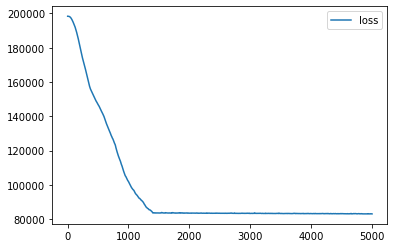

In [167]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [168]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
model_loss = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}")

1/1 - 0s - loss: 122280.6875 - 46ms/epoch - 46ms/step
Loss: 122280.6875


In [169]:
result = pd.DataFrame()
result['True'] = y
result['Predicted'] = nn_model.predict( X_scaler.transform(X))
result.head()

,True,Predicted
0,15600,212508.734375
1,83963,324022.343750
2,235122,132909.531250
3,353126,271982.968750
4,116810,178556.281250


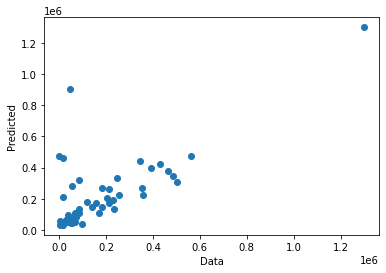

In [170]:
# compare Predicted with True

plt.scatter(result['True'],
            result['Predicted'])
# plt.title()
plt.xlabel("Data")
plt.ylabel("Predicted")

plt.show()